In [2]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
from math import factorial
from math import sqrt

**Описание проекта**

**В нашей распоряжении данные популярного сервиса аренды самокатов GoFast. На предоставлены данные из нескольких российских городов. Необходимо проанализировать данные. Сравнить поведение пользователей у которых есть подписка на сервис с поведением пользователей у которых нет подписки на сервис. Также нужно проверить гипотезы:**

**1. Тратят ли пользователи с подпиской больше времени на поездки?**

**2. Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?**

**3. Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.**

**4. Изменится ли количество обращений пользователей в техническую поддержку, если команда сервиса обновит сервера**


#### Шаг 1. Загрузка данных

In [3]:
# загрузка датафрейма с данными о пользователях
df_users = pd.read_csv('/datasets/users_go.csv')

In [4]:
# Увеличим диапазон вывода значений на экран
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
# вывод первых 5ти строк датафрейма
df_users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


**Описание данных**

user_id - уникальный идентификатор пользователя

name - имя пользователя

age - возраст пользователя

city - город

subscription_type - тип подписки (free, ultra)

In [6]:
# вывод информации о датафрейме
df_users.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Text(0, 0.5, 'число пользователей')

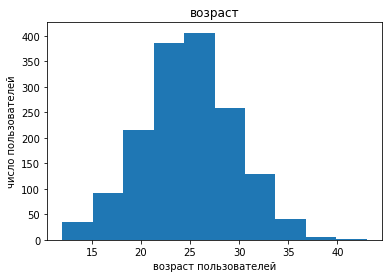

In [7]:
#выведем гистограммы фрейма для наглядности распределения данных
df_users['age'].plot(kind='hist', title='возраст');
plt.xlabel('возраст пользователей')
plt.ylabel('число пользователей')

**Заметно, что большинсто пользователей приложения от 18 до 34 лет**

In [8]:
# загрузка датафрейма с данными о поездках
df_rides = pd.read_csv('/datasets/rides_go.csv')

In [9]:
# вывод первых 5ти строк датафрейма 
df_rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


**Описание данных**

user_id - уникальный идентификатор пользователя

distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)

duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»

date - дата совершения поездки

In [10]:
# вывод информации о датафрейме
df_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Text(0, 0.5, 'количество поездок')

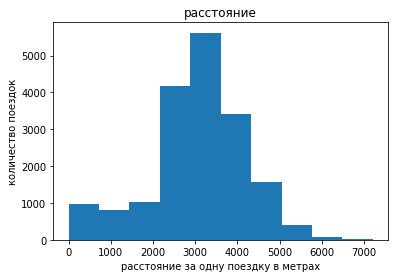

In [11]:
# выведем гистограммы фрейма для наглядности распределения данных
df_rides['distance'].plot(kind='hist', title='расстояние');
plt.xlabel('расстояние за одну поездку в метрах')
plt.ylabel('количество поездок')

**Хорошо заметно, что большая часть поездок приходится на расстояние от 2000 до 5000 метров. С пиком около 3000 метров**

Text(0, 0.5, 'количество поездок')

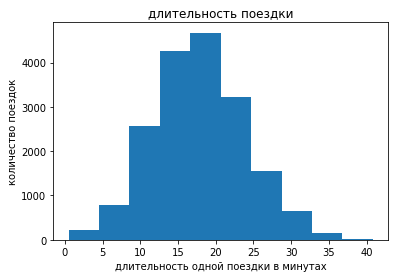

In [12]:
df_rides['duration'].plot(kind='hist', title='длительность поездки');
plt.xlabel('длительность одной поездки в минутах')
plt.ylabel('количество поездок')

**Большинство поездок укладивается в интервал от 10 до 30 минут с пиком в районе 20 минут.**

In [13]:
df_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

In [14]:
# вывод первых 5ти строк датафрейма
df_subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


**Описание данных**

subscription_type - тип подписки

minute_price - стоимость одной минуты поездки по данной подписке

start_ride_price - стоимость начала поездки

subscription_fee - стоимость ежемесячного платежа

In [15]:
# вывод информации о датафрейме
df_subscriptions.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


<AxesSubplot:>

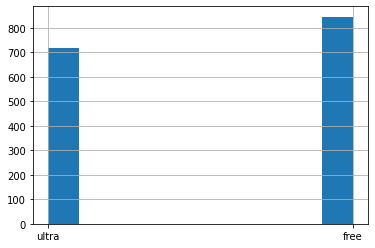

In [16]:
# выведем график фрейма для наглядности распределения данных
df_users['subscription_type'].hist()

**График показывает соотошение количества пользователей с подпиской и без. Значение 'free' - означает пользователей без подписки, значение ultra - пользоватлей с подпиской. Из графика видно, что группа пользователей без подписки больше группы пользователей с подпиской.**

#### Шаг 2. Предобработка данных

**Преобразуем дату в тип данных date**

In [17]:
# преобразуем тим данных в колонке 'date' датафрейма df_rides из типа данных object в тип данных date
df_rides['date'] = pd.to_datetime(df_rides['date'])

In [18]:
# проверим преобразование
df_rides['date'].head()
df_rides['date'].dt.year.unique()

array([2021])

**Данные представлены за один 2021 год. Можем смело разбивать на месяцы**

In [19]:
# создадим новый столбец с номером месяца
df_rides['month'] = df_rides['date'].dt.month 

# проверим  столбец
df_rides['month'].unique()

array([ 1,  4,  8, 10, 11, 12,  3,  6,  7,  2,  5,  9])

**Проверим данные на наличие пропусков и дубликатов**

In [20]:
# ищем пропуски в датафрейме пользователей
df_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [21]:
# ищем дубликаты в датафрейме пользователей по колонкам
df_users.duplicated().sum()


31

In [22]:
# проверим как выглядят дубликаты
df_users[df_users.duplicated()]

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free
1539,43,Стефания,22,Омск,ultra
1540,127,Павел,25,Пятигорск,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra
1542,204,Руслан,30,Пятигорск,ultra
1543,153,Герман,23,Москва,ultra


In [23]:
# удаляем дубликаты
df_users = df_users.drop_duplicates()

# проверка
df_users.duplicated().sum()

0

In [24]:
# проверка датафрейма с поездками на пропуски
df_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [25]:
# проверка нк дубликаты датафрейма с поездками
df_rides.duplicated().sum()

0

In [26]:
# проверка датафрейма с подписками на пропуски
df_subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [27]:
# проверка нк дубликаты датафрейма с подписками
df_subscriptions.duplicated().sum()

0

**Поготовили данные для дальнейшей работы. Удалили дубликаты и изменили тип данных в колонке с датой.**

**Из данных видно, что средний возраст пользователя около 25 лет. Среднее расстояние около 3000 метров, а среднее время в пути около 20 минут. Количество пользователей с подпиской и без делится поровну.**

#### Шаг 3. Исследовательский анализ данных

**Исследуем частоту встречаемости городов**

In [28]:
# посчитаем встречаемость городов в таблице
df_users['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

<AxesSubplot:>

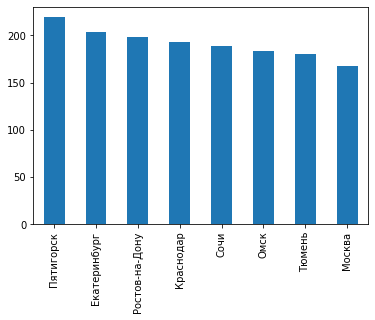

In [29]:
# построим график встречаемости городов в таблице
df_users['city'].value_counts().plot(kind="bar")

**Можно сделать вывод, что наибольшее количество пользователей из Пятигорска, числом 219. На втором месте Екатеринбург с 204мя пользователями. На последнем Москва в которой 168 пользователей.**

**Далее найдём соотношение пользователей с подпиской и без подписки**

In [30]:
# сгруппируем данные и найдём их соотношение
ultra_count = df_users['subscription_type'][df_users['subscription_type']=='ultra'].count()
free_count = df_users['subscription_type'][df_users['subscription_type']=='free'].count()

subscription_rate = ultra_count / (ultra_count + free_count)

**Почти 45.5% пользователей имеют подписку, без подписки соответсвенно 55,5%**

**Исследуем возраст пользователей**

In [31]:
#отсортируем пользователей по возрасту
df_users['age'].value_counts()

25    145
24    132
26    131
23    129
27    119
22    119
28    112
21     93
20     71
30     68
29     68
31     48
19     47
18     46
32     41
33     39
17     26
34     19
16     19
35     15
15     13
14      9
13      8
36      6
12      4
38      3
37      2
39      1
43      1
Name: age, dtype: int64

Text(0, 0.5, 'количество')

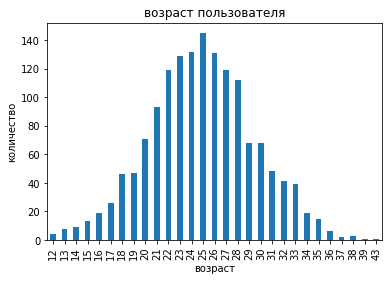

In [32]:
# построим график
df_users['age'].value_counts(sort=False).plot(kind="bar", title='возраст пользователя');
plt.xlabel('возраст')
plt.ylabel('количество')

**Заметно что пользователи в основном в возрасте от 20 до 30 лет**

In [33]:
# посчитаем какое расстояние пользователь проезжает в среднем за одну поездку
df_rides.pivot_table(index='user_id', values='distance', aggfunc='mean').head()

,distance
user_id,
1,2839.181839
2,3087.641692
3,3075.633155
4,3202.656423
5,3232.449968


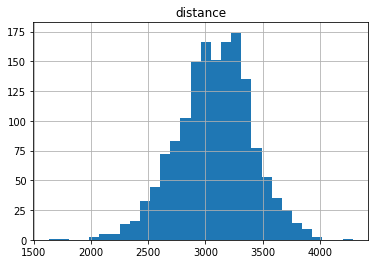

In [34]:
# выведем график
df_rides.pivot_table(index='user_id', values='distance', aggfunc='mean').hist(bins= 30);

**Большинство поездок укладывается в интервал от 2800м, до 3500м.**

**Исследуем продолжительность поездок**

In [35]:
# посчитаем сколько времени пользователь тратит в среднем за одну поездку
df_rides.pivot_table(index='user_id', values='duration', aggfunc='mean').head()

,duration
user_id,
1,17.050409
2,17.967662
3,19.432793
4,20.611684
5,15.824903


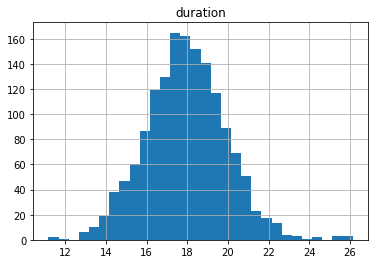

In [36]:
# выведем график 
df_rides.pivot_table(index='user_id', values='duration', aggfunc='mean').hist(bins = 30);

**Чаше всего ездят по 17 минут, большиство поездок длительностью от 15 до 21 минуты**

#### Шаг 4. Объединение данных

**Объеденение двух датафреймов, df_users и df_rides в одну таблицу df_go**

In [37]:
# объединение таблиц методом merge()
df_go = df_users.merge(df_rides, on='user_id', how='left')
df_go = df_go.merge(df_subscriptions, how='left')

In [38]:
# проверка объединения
df_go.head(5)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


**Выделим из df_go таблицу с пользователями с подпиской**

In [39]:
# передаём df_go_ultra, таблицу с подписками
df_go_ultra = df_go[df_go['subscription_type']=='ultra']

# проверка
df_go_ultra['subscription_type'].unique()


array(['ultra'], dtype=object)

**Выделим из df_go таблицу с пользователями без подписки**

In [40]:
# передаём df_go_free, таблицу без подписки
df_go_free = df_go[df_go['subscription_type']=='free']

# проверка
df_go_free['subscription_type'].unique()

array(['free'], dtype=object)

**Построим графики времени и дальности поездок для пользователей с подпиской**

<AxesSubplot:>

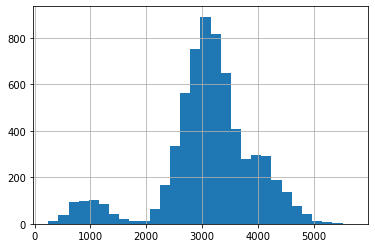

In [41]:
# гистограмма дальности поездок
df_go_ultra['distance'].hist(bins=30)

**Большинство поездок от 2500 метров до 4200 метров**

**Пик приходится на 3100 метров**

<AxesSubplot:>

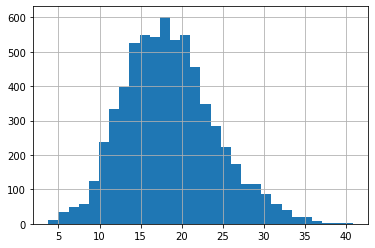

In [42]:
# гистограмма длительности поездок
df_go_ultra['duration'].hist(bins=30)

**Большинство поездок проходит от 10 ддо 27 минут. Пик приходтися на 17 минут.**

**Построим графики времени и дальности поездок для пользователей без подписки**

<AxesSubplot:>

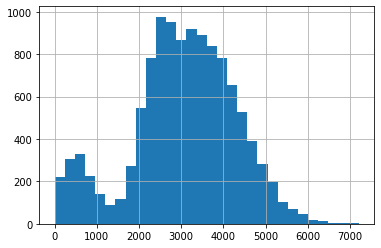

In [43]:
# гистограмма дальности поездок
df_go_free['distance'].hist(bins=30)

**Большинство поездок от 2000 метров до 4600 метров. Пик приходится на 2500 метров**

<AxesSubplot:>

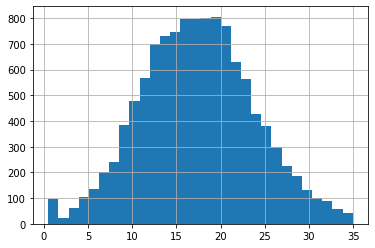

In [44]:
# гистограмма длительности поездок
df_go_free['duration'].hist(bins=30)

**Большинсто поездок от 8 до 27 минут. Пик с 16 до 20 минут**

#### Шаг 5. Подсчёт выручки

**Необходимо найти суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.**

**Найдём количество поездок каждого пользователя по месяцам**

In [45]:
# Для количества поездок для пользователя за месяц подсчитаем сколько записей 
# приходится на каждый месяц, можно использовать любой другой столбец

df_agg_go = pd.DataFrame()
df_agg_go = df_go.pivot_table(index=['user_id', 'month', 'subscription_type'],
                              values='date', aggfunc='count')


# переименуем столбец
df_agg_go.rename(columns = { 'date' : 'trip_sum'}, inplace = True)
# проверка
df_agg_go.head(10)

trip_sum
user_id month subscription_type          
1       1     ultra                     2
        4     ultra                     1
        8     ultra                     2
        10    ultra                     2
        11    ultra                     3
        12    ultra                     2
2       3     ultra                     3
        4     ultra                     2
        6     ultra                     1
        7     ultra                     2

**Выведем в отдельный столбец сборного датафрейма суммарную дальность поездок каждого пользователя**

In [46]:
# суммарное расстрояние для каждого пользователя
df_agg_go['distance_sum'] = df_go.pivot_table(index=['user_id', 'month', 'subscription_type'], values='distance', aggfunc='sum')


# проверка
df_agg_go.head(20)

trip_sum  distance_sum
user_id month subscription_type                        
1       1     ultra                     2   7027.511294
        4     ultra                     1    754.159807
        8     ultra                     2   6723.470560
        10    ultra                     2   5809.911100
        11    ultra                     3   7003.499363
        12    ultra                     2   6751.629942
2       3     ultra                     3  10187.723006
        4     ultra                     2   6164.381824
        6     ultra                     1   3255.338202
        7     ultra                     2   6780.722964
        8     ultra                     1    923.007439
        10    ultra                     1   2824.636598
        12    ultra                     1   3828.248580
3       1     ultra                     1   3061.777147
        2     ultra                     2   5421.152016
        4     ultra                     1   2956.651632
        5     ultra                     3   9064.026918
        7     ultra                     3  10919.595403
        9     ultra                     1   2891.012822
        12    ultra                     1   2593.381928

**Выведем в отдельный столбец сборного датафрейма суммарное время поездок каждого пользователя**

In [47]:
# округляем значение времени поездки
df_go['duration'] = df_go['duration'].round()

# суммарное время для каждого пользователя
df_agg_go['duration_sum'] = df_go.pivot_table(index=['user_id', 'month', 'subscription_type'], 
                                              values='duration', aggfunc='sum')


In [48]:
# сброс индекса
df_agg_go.reset_index(inplace= True )

# проверка
df_agg_go.head(10)

,user_id,month,subscription_type,trip_sum,distance_sum,duration_sum
0,1,1,ultra,2,7027.511294,42.0
1,1,4,ultra,1,754.159807,6.0
2,1,8,ultra,2,6723.470560,45.0
3,1,10,ultra,2,5809.911100,32.0
4,1,11,ultra,3,7003.499363,53.0
5,1,12,ultra,2,6751.629942,28.0
6,2,3,ultra,3,10187.723006,61.0
7,2,4,ultra,2,6164.381824,39.0
8,2,6,ultra,1,3255.338202,14.0
9,2,7,ultra,2,6780.722964,46.0


**Далее посчитаем помесячную выручку и добавим в новый столбец**

In [49]:
# введём переменные для стоимости элементов поездки

# стоимость старта с подпиской и без
start_ultra = 0
start_free = 50

# стоимость подписки
subscr_ultra = 199
subscr_free = 0

# стоимость одной минуты с подпиской и без
one_min_ultra = 6
one_min_free = 8

#функция для подсчёта помесячной суммы
def month_pay_sum(row):
    if row['subscription_type'] == 'ultra':
        month_sum = subscr_ultra + start_ultra * row['trip_sum'] + one_min_ultra * row['duration_sum']
        return month_sum
    else:
        month_sum = subscr_free + start_free * row['trip_sum'] + one_min_free * row['duration_sum']
        return month_sum

In [50]:
df_agg_go['month_pay'] = df_agg_go.apply(month_pay_sum, axis = 1)

In [74]:
# проверка, добавился ли столбец
print(df_agg_go.head())
#df_agg_go.tail()
df_agg_go['month_pay'].sum()
#df_agg_go['duration_sum'].sum()

   user_id  month subscription_type  trip_sum  distance_sum  duration_sum  \
0        1      1             ultra         2   7027.511294          42.0   
1        1      4             ultra         1    754.159807           6.0   
2        1      8             ultra         2   6723.470560          45.0   
3        1     10             ultra         2   5809.911100          32.0   
4        1     11             ultra         3   7003.499363          53.0   

   month_pay  
0      451.0  
1      235.0  
2      469.0  
3      391.0  
4      517.0  


3812767.0

**Выручка подсчитана, далее проверим гипотезы**

#### Шаг 6. Проверка гипотез

**Гипотеза №1. Тратят ли пользователи с подпиской больше времени на поездки.**

**Задача: выяснить, тратят ли пользователи с подпиской больше времени на поездку.**

**Нулевая гипотеза: в среднем, пользователи с подпиской тратят на поездку меньше или равное время, что и пользователи без подпиской..**

**Альтернативная гипотеза: пользователи с подпиской, в среднем, тратят больше времени на поездку, чем пользователи без подписки**

**Статистическая значимость 5%**

In [65]:
# уровень статистической значимости
alpha = 0.05

results = st.ttest_ind(
    df_go_ultra['duration'],
    df_go_free['duration'], 
    alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


**Выяснили, что пользователи без подписки тратят больше времени на поездку**

**Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката.**
**Гипотеза №2 расстояние, которое проезжают пользователи с подпиской не превышает 3130 метров**

**Нулевая гипотеза, среднее расстояние поездки пользователей с подпиской меньше или равно 3130 метрам**

**Альтернативная гипотеза, среднее время поездки пользователей с подпиской превышает 3130 метров**

**Статистическая значимость 5%**

In [53]:
# создадим таблицу для сравнения

In [77]:
# уровень статистической значимости
alpha = 0.05

# значение для сравнения
distance_value = 3130

results = st.ttest_1samp(
    df_go_ultra['distance'],
    distance_value,
    alternative = 'greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


**Действительно пользователи с подпиской проезжают, меньше 3130 метров, что благополучно скажется на износе самокатов**

**Гипотеза №3.Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем от пользователей без подписки**

**Нулевая гипотеза: Средняя помесячная выручка от пользователей с подпиской меньше или равна средней помесячной выручке от пользователей без подписки**

**Альтернативная гипотеза: Средняя помесячная выручка от пользователей с подпиской выше, чем средняя помесячная выручка от пользователей без подписки**

**Статистическая значимость 5%**

In [76]:
# уровень статистической значимости
alpha = 0.05

results = st.ttest_ind(
    df_agg_go.query('subscription_type == "ultra"')['month_pay'],
    df_agg_go.query('subscription_type == "free"')['month_pay'],  
    alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 1.7274069878387966e-37
Отвергаем нулевую гипотезу


**Нулевая опровергнута, а значит пользователи с подпиской приносят больше прибыли чем пользователи без подписки**

**Задание 6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?**

**Напрпшивается вывод, что нам понадобитс проверка гипотезы о равенстве средних для зависимых (парных) выборок, но в здест проверятся только равенство выборок до и после изменений. Нам же нужно проверить что изменения произошли в меньшую сторону, поэтому предлагаю проверку о равенстве средних двух генеральных совокупностей**

#### Шаг 7. Распределения

**7.1 Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 
10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.**

In [56]:
df_agg_go['user_id'].nunique()

1534

<BarContainer object of 101 artists>

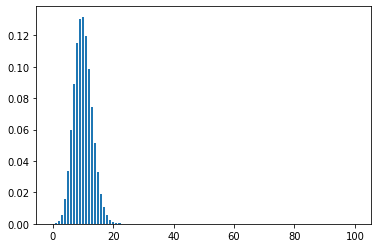

In [57]:
# используем биномиальное распределение
# построим график

# количество попыток
n = 100

# вероятность успеха
p = 0.1 

distr = []


for k in range(0, n + 1):
    choose = factorial(n) / (factorial(k) * factorial(n - k))
    prob = choose * p**k * (1 - p)**(n - k) 
    distr.append(prob)
    
plt.bar(range(0, n + 1), distr)


**Искать нужное количество на распределении больше 1000 лучше с помошью аппроксимации**

In [58]:
# задаём параметры биномиального распределения
# количесто попыток
n = 1536
# вероятность успеха
p = 0.1

# задаём параметры нормального распределения равными
# мат.ожиданию и дисперсии биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

# задаём нормальное распределение
distr = st.norm(mu, sigma) 

# считаем вероятность хвоста слева от 43 тысяч
result = 1 - distr.cdf(100)
print(result)

0.9999974273273825


**Если разослать промокоды всем, то вероятность успеха почти 100%**

**Подберём нужное количество промокодов для  успеха**

In [59]:
# задаём параметры биномиального распределения
# количесто попыток
n = 1169
# вероятность успеха
p = 0.1

# задаём параметры нормального распределения равными
# мат.ожиданию и дисперсии биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

# задаём нормальное распределение
distr = st.norm(mu, sigma) 

result = 1 - distr.cdf(100)
print(result)

0.9502851068730583


**Для вероятности успеха в подписке 100 клиентов в 95% необходимо разослать 1169 промокодов**

**7.2 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.**

**Для подсчтёта используем аппроксимацию**

In [60]:
# задаём параметры биномиального распределения
# количесто попыток
n = 1000000
# вероятность успеха
p = 0.4

# задаём параметры нормального распределения равными
# мат.ожиданию и дисперсии биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

# задаём нормальное распределение
distr = st.norm(mu, sigma) 

result = distr.cdf(399500)
print(result)

0.15371708296369768


**Вероятность в 15%, довольно небольша вероятность успеха**

**Итоговый вывод**

**Возраст пользователей приложения в основном в возрасте от 20 до 30 лет с пиком в 25**

**Большинство поездок укладывается в интервал от 2800м, до 3500м с пиком около 3000 метров.**

**В основном поездки занимат от 15 до 21 минуты чаше всего ездят по 17 минут.**

**Почти 45.5% пользователей имеют подписку, без подписки соответсвенно 55,5%**

**Наибольшее количество пользователей нахоится в  Пятигорске, числом 219. На втором месте Екатеринбург с 204мя пользователями. На последнем Москва в которой 168 пользователей.**


**В процессе исследования выяснили, что пользователи с подпиской тратят больше времени на поездку, проезжают меньше 3130 метров, а приыли приносят больше.**

**Считаю, что смело можно рекомендовать отделу маркетига рекламировать для пользоватлей подписку**